## Логистическая регрессия

Вспомните: 
- что такое регрессия?
- что такое задача классификации?

**Логистическая регерессия** - метод построения линейного **классификатора**, позволяющий оценивать апостериорные вероятности принадлежности объектов классам.

или

**Логистическая регерессия** - это модель регрессии, в которой зависимая переменная категориальная.

Мы будем рассмтаривать случай двух классов и предсказывать будем вероятности принадлежности к классу.

Основная идея линейного классификатора заключается в том, что признаковое пространство может быть разделено гиперплоскостью на две полуплоскости, в каждой из которых прогнозируется одно из двух значений целевого класса.
Если это можно сделать без ошибок, то обучающая выборка называется линейно разделимой.



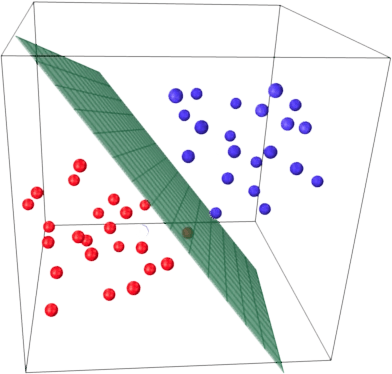

Простейший линейный классификатор:

$\large a({x}) = sign({w}^Tx)$

*Примечание: sign - знак числа*


На прошлых занятиях мы предсказывали значения функции (они могли быть любыми), сейчас мы хотим предсказывать вероятности (они могут быть от 0 до 1). Поэтому нам нужна функция, которая любое значение может поместить в промежуток от 0 до 1.

В логистической регрессии используют: 

$\large \sigma(z) = \frac{1}{1 + \exp^{-z}}$

$ exp = e = 2.71... $

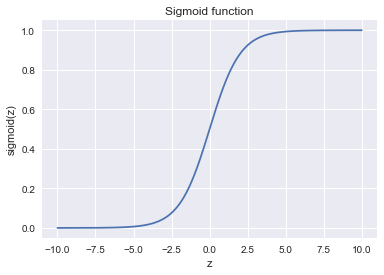

Когда не работает логистическая регрессия?

Что делать?

### Теперь код и примеры:

In [2]:
# Подключение библиотек
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [4]:
# Загрузка данных
data = pd.read_csv('microchip_tests.txt', header=None, names = ('test1','test2','released'))
data.head()

,test1,test2,released
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [5]:
data.tail()

,test1,test2,released
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0
117,0.632650,-0.030612,0


In [6]:
# Признаки
X = data.ix[:,:2].values

# Целевая переменная
y = data.ix[:,2].values

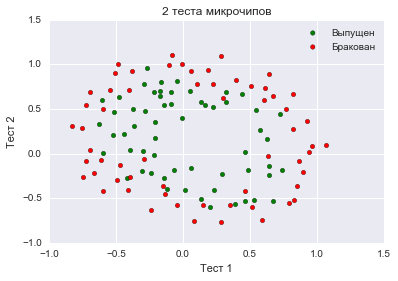

In [7]:
# Посмотрим на данные
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов')
plt.legend()

In [8]:
# Напишем функцию, чтобы рисовать разделяющую прямую
def plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
    np.arange(y_min, y_max, grid_step))

    # каждой точке в сетке [x_min, m_max]x[y_min, y_max]
    # ставим в соответствие свой цвет
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

In [9]:
# Зададим полиномиальные признаки
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)

Доля правильных ответов классификатора на обучающей выборке: 0.627


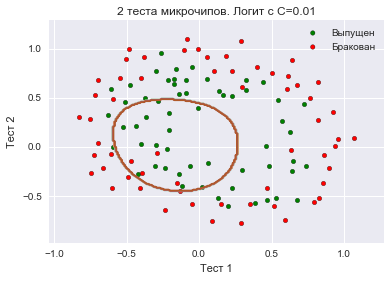

In [14]:
# С - параметр, который отвечает за регуляризацию
C = 0.01

# Обучаем нашу модель
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

# Построим график и посмотрим, что получилось
plot_boundary(logit, X, y, grid_step=.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов. Логит с C=0.01')
plt.legend();

print("Доля правильных ответов классификатора на обучающей выборке:", 
round(logit.score(X_poly, y), 3))

## Домашнее задание: Kaggle. Титаник. 

In [15]:
data_train = pd.read_csv('data/titanic/train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
data_test = pd.read_csv('data/titanic/test.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Предобработка данных - ДЗ

In [ ]:
X = ??
y = ??
C = ??

# Обучаем модель
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X, y)

In [ ]:
# Предсказываем для тестовой выборки

X_test = ??
y_test = logistic.predict(X_test) # <-- здесь происходит предсказание

# записываем y_test в файл (с помощью функции to_csv) и загружаем сабмит на кегл
